<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# **Bonus Challenge! - Taking it to the Next Level 📶**

## :coffee: Starbucks Promotional Offers

Starbucks Corporation is the leading roaster, retailer, and marketer of specialty coffee in the world.  Starbucks' mobile app routinely pushes offers to customers in hopes that it will entice the customer to visit to one of their many local coffeehouses.   The offers may be promotional like a **discount** on a seasonal beverage or pastry or **BOGO (Buy One Get One free)** or an **informational** whichs is an advertisement for a product.  Some users may receive offers more frequently than others.  

In this challenge:

1. We want to predict the responsiveness of a customer to an offer - i.e. how likely they are to make a purchase after receiving an offer.

2. We will use Spark and will introduce the Pandas on Spark API - this will help out with your Exploratory Data Analysis (EDA) and Feature Engineering.

3. You will be responsible for the majority of coding in the section, but you will be not left alone!  If you get stuck, look at the dropdown hints (🤔 **Hints**).  The hints will start off vague and get increasingly more specific to help guide you through the challenge.

5. You will use **multiclass classification** techniques in Spark to classify customer responsiveness to promotional offer campaigns.

# Multiclass (Multi-label) Classification

[Multiclass classification](https://en.wikipedia.org/wiki/Multi-label_classification) is an extension of binary classification with more than two labels where each label is an binary classification model.  The model that produces the highest probability score for the label is the label becomes the label prediction for the input.

# Spark Environment
### Make sure to run this notebook in your Spark environment!

# **Get the Data**

There are three datasets in this challenge.  **Portfolio** contains the different offer campaigns, **Profile** contains the customer profile, and **Transcript** contains the user interactions with the offer campaigns.  Have a look 👀 for yourself!

Love 🐼 Pandas?  Love Spark? Let's combine them!  Born out of a Databricks project called 🐨 Koalas, [Pandas on Spark](https://spark.apache.org/docs/latest/api/python/user_guide/pandas_on_spark/index.html), allows us to utilize the Pandas API distributed on Spark!  Check out this [article](https://towardsdatascience.com/run-pandas-as-fast-as-spark-f5eefe780c45) for a nice quickstart as well as the official [API Documentation](https://spark.apache.org/docs/3.3.0/api/python/reference/index.html)!

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
import pyspark.pandas as ps

psdf_portfolio = ps.read_csv("/FileStore/tables/starbucks_opt_assignment/portfolio.csv")
psdf_profile = ps.read_csv("/FileStore/tables/starbucks_opt_assignment/profile.csv")
psdf_transcript = ps.read_csv("/FileStore/tables/starbucks_opt_assignment/transcript.csv")

In [0]:
psdf_portfolio.head()
psdf_profile.head()
psdf_transcript.head()

,_c0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


,_c0,gender,age,id,became_member_on,income
0,0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


,_c0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


# **Explore the Data - EDA**

It's your turn to practice EDA!  Perform either manual EDA or use automated EDA tools like SweetViz!  Get to know the data, what do you notice, what stands out?

## **🤔 Hints**
<details>
<summary>Hint 1</summary>
Take a look at each dataset independently.  What do you notice?  Are there any missing values? Are there values that don't make sense? What are the unique events?
<br></br>
</details>

<details>
<summary>Hint 2</summary>
Is the dataset balanced?  
<br></br>
</details>

<details>
<summary>Hint 3</summary>
Notice that the challenge is to predict customer responsiveness. How can responsiveness be represented in the data?
</details>

## Exploring Portfolio Dataframe

In [0]:
psdf_portfolio.shape
print("\n")
psdf_portfolio.dtypes # YOUR CODE GOES HERE!
print("\n")
psdf_portfolio.isnull().sum()

Out[70]: (10, 7)

Out[70]: _c0            int32
reward         int32
channels      object
difficulty     int32
duration       int32
offer_type    object
id            object
dtype: object

Out[70]: _c0           0
reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

No missing values in the portfolio dataset and all data types as expected. Only 10 campaigns so we can view them all at once.

In [0]:
psdf_portfolio.head(10)

,_c0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [0]:
print(psdf_portfolio.offer_type.value_counts())

discount         4
bogo             4
informational    2
Name: offer_type, dtype: int64


There were 4 discount campaigns, 4 BOGO campaigns, and 2 informational campaigns.

In [0]:
psdf_portfolio.sort_values("offer_type")
psdf_portfolio.groupby("offer_type").mean()

,_c0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837


,_c0,reward,difficulty,duration
offer_type,,,,
discount,6.0,3.0,11.75,8.5
informational,4.5,0.0,0.00,3.5
bogo,3.0,7.5,7.50,6.0


On average, the difficulty and duration of discount campaigns were higher than with BOBO campaigns. The average reward for BOBO campaigns however was over twice as large.

In [0]:
psdf_portfolio.dtypes 
print("\n")
psdf_portfolio.isnull().sum()

Out[74]: _c0            int32
reward         int32
channels      object
difficulty     int32
duration       int32
offer_type    object
id            object
dtype: object

Out[74]: _c0           0
reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

## Exploring Profile Dataframe

In [0]:
psdf_profile.shape
print("\n")
psdf_profile.dtypes
print("\n")
psdf_profile.isnull().sum()

Out[75]: (17000, 6)

Out[75]: _c0                   int32
gender               object
age                   int32
id                   object
became_member_on      int32
income              float64
dtype: object

Out[75]: _c0                    0
gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [0]:
print(psdf_profile.gender.unique())
print(psdf_profile.gender.value_counts())

0       F
1    None
2       M
3       O
Name: gender, dtype: object
M    8484
F    6129
O     212
Name: gender, dtype: int64


### Investigating Age feature

Out[77]: <AxesSubplot:xlabel='age', ylabel='Count'>

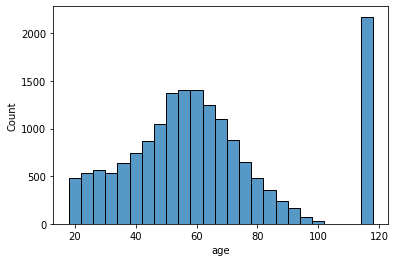

In [0]:
import seaborn as sns

sns.histplot(data=psdf_profile.to_pandas(), x="age", bins=25)

This distribution looks like a normal distribution except for the large amount of rows with age>100. Let's investigate these rows.

In [0]:
print(psdf_profile[[psdf_profile.age>110]].sum())
print(psdf_profile[psdf_profile.age>110].head())
print(psdf_profile[psdf_profile.age>110].age.unique())
print(f"The percentage of 118-year olds is {round(100*(psdf_profile[[psdf_profile.age>110]].sum()/psdf_profile.shape[0]).to_numpy()[0], 2)}%.")

age    2175
dtype: int64
   _c0 gender  age                                id  became_member_on  income
0    0   None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212     NaN
2    2   None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712     NaN
4    4   None  118  a03223e636434f42ac4c3df47e8bac43          20170804     NaN
6    6   None  118  8ec6ce2a7e7949b1bf142def7d0e0586          20170925     NaN
7    7   None  118  68617ca6246f4fbc85e91a2a49552598          20171002     NaN
0    118
Name: age, dtype: int32
The percentage of 118-year olds is 12.79%.


Since the population of 118 year olds at any time is very low, see [List of the Oldest People in the World](https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people), we can safely assume that these were throwaway or silly responses from the customers in response to being asked about their age, and so we can replace all these values with the median value (calculated by not taking into account "118-year olds").

In [0]:
# Filling misleading age values with median of age column.
age_median = psdf_profile[psdf_profile.age<118].age.median()
print(age_median)
age_experiment_df = psdf_profile.replace({'age': 118}, age_median)
age_experiment_df.head()

55.0


,_c0,gender,age,id,became_member_on,income
0,0,None,55.0,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55.0,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,None,55.0,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,None,55.0,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


Out[103]: <AxesSubplot:xlabel='age', ylabel='Count'>

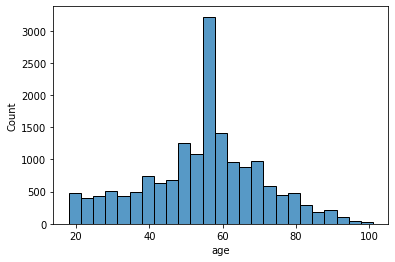

In [0]:
sns.histplot(data=age_experiment_df.to_pandas(), x="age", bins=25)

This doesn't look like too much of an improvement, since we've changed the distribution of our age feature and it's no longer a normal distribution. Let's instead try to replace the 118-year-olds by sampling from the normal distribution we see present in the rest of the data to avoid this.

In [0]:
import numpy as np

In [0]:
# Filling misleading age values by sampling from normal distribution of the rest of the age column.
age_mean = psdf_profile[psdf_profile.age<118].age.mean()
age_std = psdf_profile[psdf_profile.age<118].age.std()
print(round(age_mean, 2), round(age_std, 2))

np.random.seed(42)
age_smpl_df = psdf_profile.replace({'age': 118}, round(np.random.normal(age_mean, age_std, 1)[0]))
age_smpl_df.head()

54.39 17.38


,_c0,gender,age,id,became_member_on,income
0,0,None,63,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,None,63,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,None,63,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


Out[118]: <AxesSubplot:xlabel='age', ylabel='Count'>

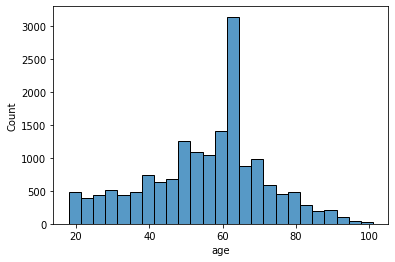

In [0]:
sns.histplot(data=age_smpl_df.to_pandas(), x="age", bins=25)

In [0]:
age_smpl_df.age.mean(), age_mean
age_smpl_df.age.std(), age_std

Out[119]: (55.49464705882353, 54.39352445193929)Out[119]: (16.486139107934825, 17.383705365855015)

# **Setup the ETL Pipeline + Feature Engineering (The Art 🎨 🖌 of ML**)

Bring the datasets together, perform feature engineering, rename columns, and drop columns that you don't need for predictions.

**Required**: Create a feature for customer responsiveness using the event column in the transcript table.  

  *   Create **five** labels (one for each event + unresponsive) for customer responsiveness using a 5-point Likert scale:
  
    1. Unresponsive, 
    2. Slightly Responsive, 
    3. Somewhat Responsive 
    4. Moderately Responsive,
    5. Very Responsive.

## **🤔 Hints**
<details>
<summary>Hint 1</summary>
Take a look at the AGE, GENDER, and INCOME variables.  Do you notice anything unusual?  Do the values make sense?  How will you handle this?
<br></br>
</details>

<details>
<summary>Hint 2</summary>
Are there any other features that you could create features for?  
<br></br>
</details>

<details>
<summary>Hint 3</summary>
As you bring the datasets together, what do you notice about the relationship between the customer and transcript tables?  Is it a one-to-one or a one-to-many relationship?
<br></br>
</details>

<details>
<summary>Hint 4</summary>
Since the data has a one-to-many relationship between the customer and transcript tables. You will need flatten your dataset (i.e. in one row per customer).
</details>

<details>
<summary>Hint 5</summary>
Create binary features (dummy variables) for the channels, offer_type, and event variables.  Use the event dummy variables to create your customer responsiveness labels.
<br></br>
</details>

### Here's a freebie! Let's create a row-level function to parse out the offer id value. This probably won't be the last time that you'll need it! 😉

In [0]:
import pandas as pd

# Row-level function to clean offer id in transcript table.
def get_offer_id(offer_id):
  offer_id = offer_id.split()[2]
  return offer_id[1:len(offer_id)-2]

psdf_transcript["offer_id"] = psdf_transcript["value"].apply(get_offer_id)

# Drop original value column
psdf_transcript = psdf_transcript.drop("value")

psdf_transcript.head()

In [0]:
# YOUR CODE GOES HERE!

# **Modeling**

## Prepare your dataset for ML!

In [0]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

# YOUR CODE GOES HERE!

## Train-Test-Split

In [0]:
# YOUR CODE GOES HERE!

There are a couple different ways to setup a multiclass classifier as an extension of Logistic Regression in PySpark: 

1.   Multinomial Logistic Regression (softmax)
2.   One vs Rest (OVR) / One vs All (OVA)

### Multinomial Logistic Regression (softmax)

Logistic Regression can be adapted to a multiclass task by using the setting the `family = "multinomial"`.

In [0]:
from pyspark.ml.classification import LogisticRegression

# Instantiate the classifier

# Fit the model 
# YOUR CODE GOES HERE!

# Make Predictions
# YOUR CODE GOES HERE!

# Evaluate the model
# YOUR CODE GOES HERE!


### One vs Rest (OVR) / One vs All (OVA)

In [0]:
from pyspark.ml.classification import LogisticRegression, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# instantiate the base Logistic Regression classifier.

# instantiate the One Vs Rest Classifier.
ovr = OneVsRest(classifier=lr)

# Fit the model 
# YOUR CODE GOES HERE!

# Make Predictions
# YOUR CODE GOES HERE!

# Evaluate the model
# YOUR CODE GOES HERE!


## Setup Your Modeling Pipeline with Hyper Parameter Tuning

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# YOUR CODE GOES HERE!

Additionally, you can solve Multiclass Classification problems using:

1.   Random Forest
2.   Decision Trees
3.   Naïve Bayes

You can also extend the idea of multiclass classification to [multi-label multiclassification](https://en.wikipedia.org/wiki/Multi-label_classification).

But that's another lesson...

## Review Questions

1.  What are two other applications you could use multiclass classification for?
2.  What do you think the drawbacks to multiclass classifications are?